# Previsão UTI Covid - Sirio Libanes

# Módulo 05

## Aula 02 - Ambiente de trabalho e Desenvlolvimento

In [1]:
import pandas as pd
import numpy as np

In [2]:
caminho = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_05_e_06/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
dados = pd.read_excel(caminho)

dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [3]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

In [4]:
dados.ICU

0       0
1       0
2       0
3       0
4       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1925, dtype: int64

In [5]:
dados.ICU.value_counts()

0    1410
1     515
Name: ICU, dtype: int64

### Desafio 01 - pesquisar aprendizado supervisionado, não supervisionado, por reforço e mais (forma).



### Desafio 02 - Pesquisar sobre classificação, regressão e outros problemas que podem ser solucionados com Machine Learning.


## Aula 03: Modelos de Machine Learning

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
modelo = LogisticRegression()

In [8]:
x_columns = list(dados.describe().columns)
dados_limpos = dados.dropna().copy()

In [9]:
y = dados_limpos['ICU'].copy()
x = dados_limpos[x_columns].drop('ICU', axis = 1).copy()

In [10]:
modelo.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
modelo.predict([x.iloc[4]])

array([1])

In [12]:
y.iloc[4]

1

In [13]:
accuracy = (sum(modelo.predict(x) == y) / len(y)) * 100
accuracy

91.00917431192661

In [14]:
(sum(modelo.predict(x) != y) / len(y))*100

8.990825688073395

### Desafio 03 - Qual o motivo de jogar fora o ICU do dado X? O que acontece se estiver no x? Pq seria bom/ruim? 

### Desafio 04 - Pesquisar sobre ética em data science/ciência de dados e inteligência artificial .

## Aula 04: Métricas e Avaliações

In [15]:
y.value_counts()

0    281
1    264
Name: ICU, dtype: int64

In [16]:
from sklearn.dummy import DummyClassifier

modelo = DummyClassifier()
modelo.fit(x,y)
(sum(modelo.predict(x) == y) / len(y))*100

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


52.477064220183486

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y, modelo.predict(x))

0.48440366972477067

In [18]:
from sklearn.model_selection import train_test_split
np.random.seed(73246)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.3)

In [19]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


381 381
164 164


In [20]:
modelo = LogisticRegression()
modelo.fit(x_train, y_train)
y_prediction = modelo.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
accuracy_score(y_test, y_prediction)

0.8292682926829268

### Desafio 05 - Decida quanto você vai escolher para treino e quanto para teste? Quanto as pessoas utilizam e qual o motivo?

### Desafio 06 - Olhe a documentação da LogisticRegression... o que tem de parâmetro em comum com o train_test_split? O que isso significa pra nós? 

## Aula 05: Compreendendo o problema real

In [22]:
caminho = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_05_e_06/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
dados = pd.read_excel(caminho)

In [23]:
def preenche_tabela(dados):
  features_continuas_colunas = dados.iloc[:,13:-2].columns 
  features_continuas=dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method="ffill").fillna(method='bfill')
  features_categoricas = dados.iloc[:,:13]
  saida = dados.iloc[:,-2:]
  dados_finais = pd.concat([features_categoricas, features_continuas, saida],ignore_index=True, axis=1)
  dados_finais.columns = dados.columns
  return dados_finais

In [24]:
dados_limpos = preenche_tabela(dados)
dados_limpos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,0.333333,-0.230769,-0.132075,-0.593220,-0.107143,0.736842,0.333333,-0.230769,-0.132075,-0.586207,-0.107143,0.736842,0.443299,0.0000,-0.025641,-0.500000,0.318681,0.898990,-0.076923,-0.459459,-0.313433,-0.63636

In [25]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.0,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.550349,0.550349,0.550349,0.550349,-1.0,-0.981793,-0.981793,-0.981793,-0.981793,-1.0,-0.946031,-0.946031,-0.946031,-0.946031,-1.0,-0.314653,-0.314653,-0.314653,-0.314653,-1.0,-0.318061,-0.318061,-0.318061,-0.318061,-1.0,-0.946194,-0.946194,-0.946194,...,-0.954252,-0.954252,-1.0,-0.072529,-0.328239,-0.261038,-0.446696,0.072480,0.748537,-0.076075,-0.332671,-0.263690,-0.439785,0.069267,0.752796,0.009399,-0.169805,-0.229606,-0.448757,0.355901,0.844893,-0.258253,-0.434771,-0.318550,-0.382920,-0.021645,0.805126,-0.818498,-0.805300,-0.823067,-0.796211,-0.831911,-0.919693,-0.843716,-0.796734,-0.869248,-0.807560,-0.832776,-0.919584,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.187898,0.187898,0.187898,0.187898,0.0,0.109844,0.109844,0.109844,0.109844,0.0,0.141756,0.141756,0.141756,0.141756,0.0,0.067938,0.067938,0.067938,0.067938,0.0,0.105340,0.105340,0.105340,0.105340,0.0,0.059767,0.059767,0.059767,...,0.134259,0.134259,0.0,0.256547,0.275713,0.247852,0.216000,0.248730,0.134322,0.261753,0.278592,0.253902,0.226178,0.255550,0.131652,0.275071,0.269218,0.265246,0.262153,0.210648,0.233901,0.246646,0.265763,0.273801,0.353062,0.265408,0.142677,0.316782,0.354669,0.321999,0.406496,0.287052,0.243907,0.282808,0.364214,0.235885,0.375520,0.285875,0.244444,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [26]:
dados_limpos = dados_limpos.dropna()

In [27]:
a_remover = dados_limpos.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values

In [28]:
dados_limpos = dados_limpos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1760.000000,1760.000000,1760.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,...,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,192.818182,0.457386,0.380682,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,0.212500,0.163636,0.828977,0.556086,0.556086,0.556086,0.556086,-1.0,-0.985555,-0.985555,-0.985555,-0.985555,-1.0,-0.948736,-0.948736,-0.948736,-0.948736,-1.0,-0.314399,-0.314399,-0.314399,-0.314399,-1.0,-0.315992,-0.315992,-0.315992,-0.315992,-1.0,-0.945832,-0.945832,-0.945832,...,-0.954625,-0.954625,-1.0,-0.067473,-0.335719,-0.263742,-0.462974,0.074319,0.749404,-0.071528,-0.340052,-0.266134,-0.455741,0.071124,0.753140,0.018076,-0.169759,-0.227282,-0.457508,0.363012,0.849610,-0.260004,-0.445989,-0.324635,-0.408023,-0.024177,0.803125,-0.827599,-0.818077,-0.831367,-0.813369,-0.841694,-0.925178,-0.852285,-0.809092,-0.874791,-0.821924,-0.842610,-0.925164,0.201705
std,110.637724,0.498322,0.485692,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,0.409193,0.370050,0.376636,0.180540,0.180540,0.180540,0.180540,0.0,0.105194,0.105194,0.105194,0.105194,0.0,0.139014,0.139014,0.139014,0.139014,0.0,0.064575,0.064575,0.064575,0.064575,0.0,0.101929,0.101929,0.101929,0.101929,0.0,0.062164,0.062164,0.062164,...,0.138371,0.138371,0.0,0.253403,0.265682,0.246710,0.202831,0.243375,0.127638,0.258404,0.268284,0.252963,0.213449,0.250693,0.127605,0.268843,0.259842,0.260774,0.245660,0.191350,0.224878,0.240722,0.253140,0.268898,0.335868,0.260564,0.138728,0.304501,0.336412,0.308805,0.385784,0.265921,0.234440,0.270025,0.347524,0.228338,0.358887,0.264551,0.234701,0.401387
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [29]:
def prepare_window(rows):
  if (np.any(rows['ICU'])):
    rows.loc[rows['WINDOW']=='0-2', 'ICU'] = 1
  return rows.loc[rows["WINDOW"]=="0-2"]


dados_limpos = dados_limpos.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)

In [30]:
x_columns = list(dados_limpos.describe().columns)

y = dados_limpos['ICU'].copy()
x = dados_limpos[x_columns].drop('ICU', axis = 1).copy()

np.random.seed(73246)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.3)

In [31]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)
y_prediction = modelo.predict(x_test)

In [32]:
accuracy_score(y_test, y_prediction)

0.6981132075471698

### Desafio 07 - Arranque fora as colunas que não devem ser utilizadas.

### Desafio 08 - Essa aula não foi simples, repasse por ela e garanta que entendeu passo a passo.



In [33]:
dados_limpos.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.017361,0.071961,0.058683,0.022828,0.045907,-0.026074,-0.005678,0.021964,0.024226,0.010275,-0.023086,-0.016204,-0.016204,-0.016204,-0.016204,NaN,0.049984,0.049984,0.049984,0.049984,NaN,0.006078,0.006078,0.006078,0.006078,NaN,0.056260,0.056260,0.056260,0.056260,NaN,0.026611,0.026611,0.026611,0.026611,NaN,0.019479,0.019479,0.019479,...,-0.049470,-0.049470,NaN,0.095052,0.074880,0.076525,0.021779,-0.011847,-0.023686,0.093877,0.069839,0.077927,0.002525,-0.014158,-0.024354,0.096918,0.096265,0.081255,0.043287,0.000536,-0.014310,0.077751,0.057881,0.063673,0.015626,-0.020210,-0.024753,-0.040615,-0.082139,-0.038959,-0.046410,-0.045353,-0.018859,-0.051978,-0.080779,-0.059587,-0.030755,-0.045456,-0.015996,-0.041382
AGE_ABOVE65,-0.017361,1.000000,0.031830,0.280326,0.051308,0.165905,0.032608,0.314536,0.003930,0.330744,0.169178,0.137186,-0.111907,-0.111907,-0.111907,-0.111907,NaN,0.084437,0.084437,0.084437,0.084437,NaN,0.105449,0.105449,0.105449,0.105449,NaN,0.026422,0.026422,0.026422,0.026422,NaN,0.057582,0.057582,0.057582,0.057582,NaN,0.020171,0.020171,0.020171,...,0.073243,0.073243,NaN,-0.146802,0.222891,-0.223129,0.104568,-0.086413,-0.109800,-0.148504,0.220684,-0.207480,0.100707,-0.083182,-0.101247,-0.125120,0.221515,-0.232097,0.101549,-0.093789,-0.100968,-0.138507,0.210206,-0.222678,0.092669,-0.076399,-0.119952,-0.012655,-0.026278,0.012440,-0.005558,0.028262,-0.030515,0.009262,-0.039387,0.002790,-0.021190,0.029317,-0.031404,0.291010
GENDER,0.071961,0.031830,1.000000,0.036528,-0.001784,-0.064757,-0.069768,-0.019812,-0.020573,-0.013136,-0.026982,0.054201,-0.089776,-0.089776,-0.089776,-0.089776,NaN,-0.007560,-0.007560,-0.007560,-0.007560,NaN,0.025088,0.025088,0.025088,0.025088,NaN,0.046393,0.046393,0.046393,0.046393,NaN,-0.036801,-0.036801,-0.036801,-0.036801,NaN,-0.083919,-0.083919,-0.083919,...,0.052601,0.052601,NaN,-0.088389,-0.056697,0.005398,-0.111659,-0.137264,0.115275,-0.081783,-0.059140,0.014022,-0.109075,-0.128662,0.110646,-0.085108,-0.049361,-0.017607,-0.106986,-0.139588,0.106104,-0.092784,-0.059040,0.015428,-0.109968,-0.138600,0.124280,-0.006168,-0.019919,0.079236,-0.016903,-0.012423,0.028744,-0.011922,-0.021507,0.074222,-0.014353,-0.011416,0.029412,-0.117938
DISEASE GROUPING 1,0.058683,0.280326,0.036528,1.000000,0.196347,0.278271,0.017529,0.340370,0.202849,0.489245,0.176224,0.153793,-0.009174,-0.009174,-0.009174,-0.009174,NaN,-0.026569,-0.026569,-0.026569,-0.026569,NaN,0.107699,0.107699,0.107699,0.107699,NaN,0.016371,

# Módulo 06

Machine Learning: Modelos, Métricas e Validação

## Aula 01: Workflow de Machine Learning

In [34]:
for coluna in dados_limpos.columns:
  if coluna not in x_columns:
    print(coluna)

AGE_PERCENTIL
WINDOW


In [35]:
dados_limpos['AGE_PERCENTIL'] = dados_limpos['AGE_PERCENTIL'].astype('category').cat.codes

In [36]:
x_columns = list(dados_limpos.columns)

y = dados_limpos['ICU'].copy()
x = dados_limpos[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

np.random.seed(73246)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.3)

modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)
y_prediction = modelo.predict(x_test)

In [37]:
accuracy_score(y_test, y_prediction)

0.6792452830188679

### Desafio 01: Transformar a coluna AGE_PERCENTIL em dados categóricos, mas utilizando outro método.

In [38]:
dict_temp_percentil = {'60th':0, '90th':0, '10th':0, '40th':0, '70th':0, '20th':0, '50th':0, '80th':0,'30th':0, 'Above 90th':0}

dados.AGE_PERCENTIL.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [39]:
dict_temp_percentil = {'60th':1, '90th':0, '10th':0, '40th':0, '70th':0, '20th':0, '50th':0, '80th':0,'30th':0, 'Above 90th':0}


dados['age_percentil_60'] = dados.AGE_PERCENTIL
dados['age_percentil_60'] = dados['age_percentil_60'].map(lambda x: dict_temp_percentil[x])

dados['age_percentil_60']

0       1
1       1
2       1
3       1
4       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: age_percentil_60, Length: 1925, dtype: int64

In [40]:
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,age_percentil_60
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,1
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,1
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,1
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0,1
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.09677

## Aula 02: Métricas de Avaliação

In [41]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
y_pred = modelo_arvore.predict(x_test)

accuracy_score(y_test, y_pred)


0.6698113207547169

In [42]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt



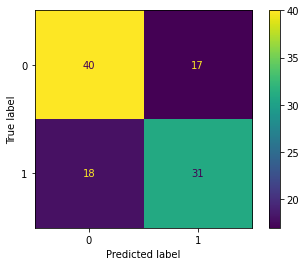

In [43]:
plot_confusion_matrix(modelo_arvore, x_test, y_test)

In [44]:
VP = 31
VN = 40
FP = 17
FN = 18

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70        57
           1       0.65      0.63      0.64        49

    accuracy                           0.67       106
   macro avg       0.67      0.67      0.67       106
weighted avg       0.67      0.67      0.67       106



In [46]:
from sklearn.metrics import roc_auc_score

prob_arvore = modelo_arvore.predict_proba(x_test)
roc_auc_score(y_test,prob_arvore[:,1])

0.667203723594701

In [47]:
def roda_modelo(modelo, dados,random):

  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

  np.random.seed(random)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  modelo.fit(x_train,y_train)
  predicao = modelo.predict(x_test)
  prob_predict = modelo.predict_proba(x_test)

  auc = roc_auc_score(y_test, prob_predict[:,1])
  print(f"AUC: {auc}")
  print("\nClassification Report ")
  print(classification_report(y_test, predicao))

In [48]:
roda_modelo(modelo_arvore,dados_limpos, None)

AUC: 0.6453035806953815

Classification Report 
              precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.62      0.61      0.62        41

    accuracy                           0.65        88
   macro avg       0.65      0.65      0.65        88
weighted avg       0.65      0.65      0.65        88



In [49]:
roda_modelo(modelo,dados_limpos, None)

AUC: 0.7114686040477426

Classification Report 
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        47
           1       0.61      0.56      0.58        41

    accuracy                           0.62        88
   macro avg       0.62      0.62      0.62        88
weighted avg       0.62      0.62      0.62        88



### Desafio 02: Verificar o impacto da mudança nos resultados.


### Desafio 03: Pesquisar sobre F-score.



### Desafio 04: Pesquisar e plotar a arvore de decisão criada pelo modelo.



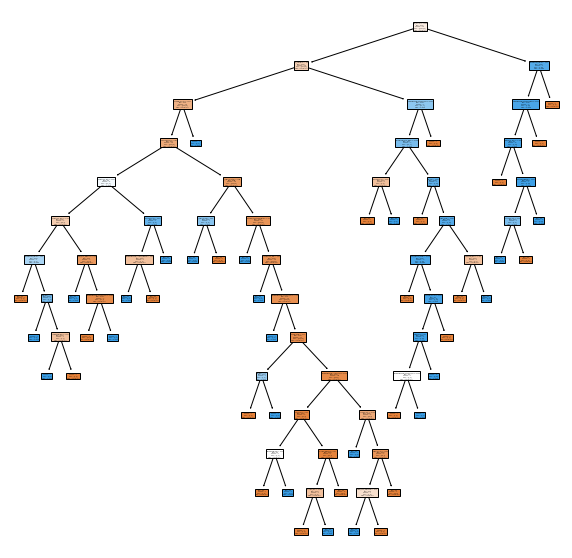

In [50]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(modelo_arvore, feature_names=x_columns, class_names=["Não vai à UTI", "Vai à UTI"], filled = True)
plt.show()

### Desafio 05: Criar uma função que gere a curva ROC.



In [51]:
from sklearn.metrics import plot_roc_curve

In [52]:
x_columns = list(dados_limpos.columns)

y = dados_limpos['ICU'].copy()
x = dados_limpos[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

np.random.seed(73246)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size = 0.3)

modelo = LogisticRegression(max_iter=10000)
modelo.fit(x_train, y_train)
y_prediction = modelo.predict(x_test)

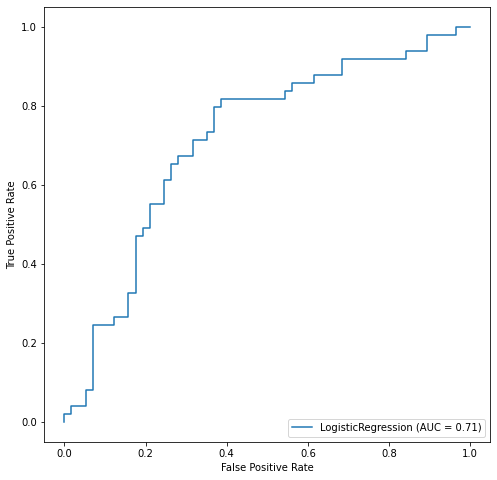

In [53]:
fig, ax1 = plt.subplots(figsize=(8,8))
plot_roc_curve(modelo, x_test, y_test,ax=ax1)
plt.show()

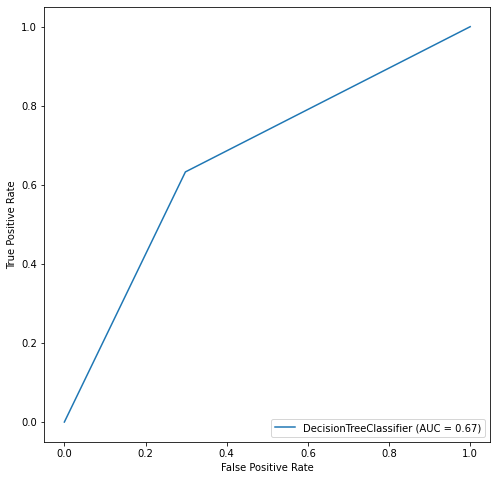

In [54]:
modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
y_pred = modelo_arvore.predict(x_test)

fig, ax1 = plt.subplots(figsize=(8,8))
plot_roc_curve(modelo_arvore, x_test, y_test,ax=ax1)
plt.show()

### Desafio 06: Pensar e tentar diminuir o efeito de aleatoriedade nas previsões.



## Aula 03: Aleatoriedade dos modelos

In [55]:
import numpy as np

In [56]:
def roda_n_modelo(modelo, dados,n):

  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()
  auc_lista = []

  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train,y_train)
    prob_predict = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predict[:,1])
    auc_lista.append(auc)

  auc_media = np.mean(auc_lista)
  auc_std = np.std(auc_lista)
  print(f"AUC: {auc_media}")
  print(f"Intervalo: {auc_media - 2 * auc_std} até {auc_media + 2 * auc_std}")

In [57]:
roda_n_modelo(modelo_arvore, dados_limpos, 50)

AUC: 0.6355163466528283
Intervalo: 0.533655201117157 até 0.7373774921884996


In [58]:
roda_n_modelo(modelo, dados_limpos, 50)

AUC: 0.7770939283860924
Intervalo: 0.6962034479444613 até 0.8579844088277234


### Desafio 07: Estudar a documentação do sklearn e testar outros modelos.

In [59]:
from sklearn.svm import SVC

In [60]:
svc = SVC(probability=True, gamma = "auto")
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
roda_n_modelo(svc, dados_limpos, 50)

AUC: 0.5242812662169175
Intervalo: 0.3779361927079492 até 0.6706263397258858


In [62]:
roda_n_modelo(svc, dados_limpos, 50)

AUC: 0.5291593149974054
Intervalo: 0.3832942537120824 até 0.6750243762827284


## Aula 04: Validação cruzada

In [63]:
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit

cv = StratifiedKFold(n_splits=5, shuffle = True)
cross_validate(modelo,x,y, cv = cv)

{'fit_time': array([0.2349298 , 0.27897811, 0.22261333, 0.21857619, 0.59772086]),
 'score_time': array([0.00208187, 0.00209045, 0.00205827, 0.0020628 , 0.00207281]),
 'test_score': array([0.67605634, 0.74647887, 0.68571429, 0.71428571, 0.61428571])}

In [64]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
cross_validate(modelo,x,y, cv = cv)

{'fit_time': array([0.63825035, 0.52302623, 0.63503003, 0.48626304, 0.18721175,
        0.44113684, 0.16642666, 0.68171453, 0.5786097 , 0.24248219,
        0.23813438, 0.21688104, 0.58151698, 0.58500409, 0.57439137,
        0.58593369, 0.5066824 , 0.61437988, 0.27922726, 0.21496367,
        0.27559114, 0.47620988, 0.56929302, 0.58662558, 0.56689858,
        0.53616929, 0.5498414 , 0.20050311, 0.19805837, 0.65424824,
        0.65837407, 0.25567818, 0.2109704 , 0.21436   , 0.54110575,
        0.56110978, 0.59680581, 0.56407285, 0.27729225, 0.19915938,
        0.62442136, 0.69728422, 0.19001126, 0.26586533, 0.19345784,
        0.17544103, 0.5854187 , 0.47747493, 0.19413447, 0.23938417]),
 'score_time': array([0.00208187, 0.00209308, 0.00206637, 0.00208211, 0.00206518,
        0.00205326, 0.00208092, 0.00206995, 0.00216579, 0.00206852,
        0.00207543, 0.00209332, 0.00208592, 0.00207901, 0.00207496,
        0.00209808, 0.00208402, 0.00220513, 0.00208664, 0.0020926 ,
        0.00209308, 

In [65]:
def roda_modelo_cv(modelo, dados,n_splits, n_repeats):

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop = True)
  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  resultados = cross_validate(modelo,x,y, cv = cv, scoring="roc_auc")

  auc_medio = np.mean(resultados['test_score'])
  
  auc_std = np.std(resultados['test_score'])

  print(f"AUC médio: {auc_medio}")
  print(f"\nIntervalo: {auc_medio - 2 * auc_std} até {auc_medio + 2 * auc_std}")

In [66]:
roda_modelo_cv(modelo, dados_limpos, 5, 10)

AUC médio: 0.7608822174447174

Intervalo: 0.6392135232896881 até 0.8825509115997467


In [67]:
roda_n_modelo(modelo, dados_limpos, 50)

AUC: 0.7644628956927868
Intervalo: 0.6578688256284695 até 0.8710569657571041


In [68]:
roda_modelo_cv(modelo_arvore, dados_limpos, 5, 10)

AUC médio: 0.6354170034268719

Intervalo: 0.5105613287675191 até 0.7602726780862247


In [69]:
roda_modelo_cv(svc, dados_limpos, 5, 10)

AUC médio: 0.5643753771714298

Intervalo: 0.46395789501760354 até 0.6647928593252561


### Desafio 08: Testar outros splitter classes e observar as diferenças.

In [70]:
def roda_modelo_desafio(modelo, dados,n_splits):

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop = True)
  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

  cv = StratifiedShuffleSplit(n_splits= n_splits, test_size=0.2)
  resultados = cross_validate(modelo,x,y, cv = cv, scoring="roc_auc")

  auc_medio = np.mean(resultados['test_score'])
  auc_std = np.std(resultados['test_score'])

  print(f"AUC médio: {auc_medio}")
  print(f"\nIntervalo: {auc_medio - 2 * auc_std} até {auc_medio + 2 * auc_std}")

In [71]:
roda_modelo_desafio(modelo, dados_limpos, 10)

AUC médio: 0.7778309409888358

Intervalo: 0.6934182746044432 até 0.8622436073732284


## Aula 05: Desafios em Machine Learning

In [72]:
def roda_modelo_cv(modelo, dados,n_splits, n_repeats):

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop = True)
  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  resultados = cross_validate(modelo,x,y, cv = cv, scoring="roc_auc", return_train_score=True)

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])
  auc_std = np.std(resultados['test_score'])

  print(f"AUC treino: {auc_medio_treino}")
  print(f"\nAUC médio: {auc_medio}")
  print(f"\nIntervalo: {auc_medio - 2 * auc_std} até {auc_medio + 2 * auc_std}")
  

In [73]:
modelo_arvore_2 = DecisionTreeClassifier(max_depth=6)
roda_modelo_cv(modelo_arvore_2,dados_limpos,5,10)

AUC treino: 0.9558387500519351

AUC médio: 0.6215446315035131

Intervalo: 0.469482803323066 até 0.7736064596839602


In [74]:
roda_modelo_cv(modelo_arvore,dados_limpos,5,10)

AUC treino: 1.0

AUC médio: 0.6354170034268719

Intervalo: 0.5105613287675191 até 0.7602726780862247


In [75]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier()

In [76]:
roda_modelo_cv(modelo_random_forest, dados_limpos, 5, 10)

AUC treino: 1.0

AUC médio: 0.7950831595650674

Intervalo: 0.7039516101468738 até 0.8862147089832609


In [77]:
roda_n_modelo(modelo_random_forest,dados_limpos, 50)

AUC: 0.7930565646081991
Intervalo: 0.706287510918459 até 0.8798256182979391


In [78]:
modelo_random_forest = RandomForestClassifier(n_estimators=100)
roda_modelo_cv(modelo_random_forest, dados_limpos, 5, 10)

AUC treino: 1.0

AUC médio: 0.7950831595650674

Intervalo: 0.7039516101468738 até 0.8862147089832609


### Desafio 10: Criar um sobreajuste com outra base de dados, outro modelo de ML e plotar o gráfico para análise. (Dica: Base do titanic).

### Desafio 11: Estudar um pouco mais sobre overfit e underfit.



### Desafio 12: Escolha um modelo de ML, estude os hiperparâmetros desse modelo e teste vários hiperparâmetros.

### Desafio 13: Pesquisar como salvar um modelo treinado.



## Aula 06: Finalizando a Avaliação


In [81]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 352 entries, (0, 0) to (384, 1920)
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), int8(1), object(1)
memory usage: 649.8+ KB


In [82]:
dados_limpos.select_dtypes(exclude="float64")

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,
0,0,0,1,5,0,0-2,1
2,10,2,0,0,0,0-2,1
3,15,3,0,3,1,0-2,0
4,20,4,0,0,0,0-2,0
5,25,5,0,0,0,0-2,0
...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0-2,1
381,1905,381,1,9,0,0-2,0
382,1910,382,0,4,0,0-2,1


In [83]:
alta_corr = 0.95
matrix_corr = dados_limpos.iloc[:,4:-2].corr().abs()
excluir = [coluna for coluna in matrix_corr.columns if any(matrix_corr[coluna] >= alta_corr)]

In [84]:
matrix_superior = matrix_corr.where(np.triu(np.ones(matrix_corr.shape),k=1).astype(np.bool))
excluir = [coluna for coluna in matrix_superior.columns if any(matrix_superior[coluna] >= alta_corr)]

In [85]:
def remove_coluna_corr(dados, valor_corte):


  matrix_corr = dados.iloc[:,4:-2].corr().abs()
  matrix_superior = matrix_corr.where(np.triu(np.ones(matrix_corr.shape),k=1).astype(np.bool))
  excluir = [coluna for coluna in matrix_superior.columns if any(matrix_superior[coluna] >= valor_corte)]

  return dados.drop(columns = excluir)

In [86]:
dados_limpos_sem_corr = remove_coluna_corr(dados_limpos, 0.95)
dados_limpos_sem_corr.shape

(352, 100)

In [87]:
roda_modelo_cv(modelo_random_forest, dados_limpos, 5, 10)

AUC treino: 1.0

AUC médio: 0.7950831595650674

Intervalo: 0.7039516101468738 até 0.8862147089832609


In [88]:
roda_modelo_cv(modelo_random_forest, dados_limpos_sem_corr, 5, 10)

AUC treino: 1.0

AUC médio: 0.8042152274882538

Intervalo: 0.7106928870469127 até 0.8977375679295949


In [89]:
roda_modelo_cv(modelo, dados_limpos_sem_corr, 5, 10)

AUC treino: 0.851877094160818

AUC médio: 0.7671919856459332

Intervalo: 0.6487705248309334 até 0.8856134464609329


###Desafio 09: Deixar o gráfico de AUC bonitão.



In [90]:
def roda_modelo_treino_test(modelo, dados,n_splits, n_repeats):

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop = True)
  x_columns = list(dados.columns)
  y = dados['ICU'].copy()
  x = dados[x_columns].drop(['ICU', 'WINDOW'], axis = 1).copy()

  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
  resultados = cross_validate(modelo,x,y, cv = cv, scoring="roc_auc", return_train_score=True)

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])
  auc_std = np.std(resultados['test_score'])

  #print(f"AUC treino: {auc_medio_treino}")
  #print(f"\nAUC médio: {auc_medio}")
  #print(f"\nIntervalo: {auc_medio - 2 * auc_std} até {auc_medio + 2 * auc_std}")
  return resultados['train_score'],resultados['test_score']

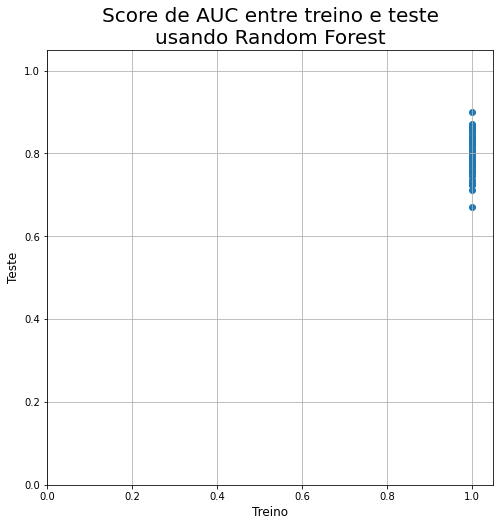

In [91]:
treino, test = roda_modelo_treino_test(modelo_random_forest,dados_limpos_sem_corr, 5,10)

fig, ax = plt.subplots(figsize = (8,8))

plt.scatter(treino,test)
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel("Treino", fontsize = 12)
plt.ylabel("Teste", fontsize = 12)
plt.title("Score de AUC entre treino e teste\nusando Random Forest", fontsize = 20)
plt.grid()

plt.show()

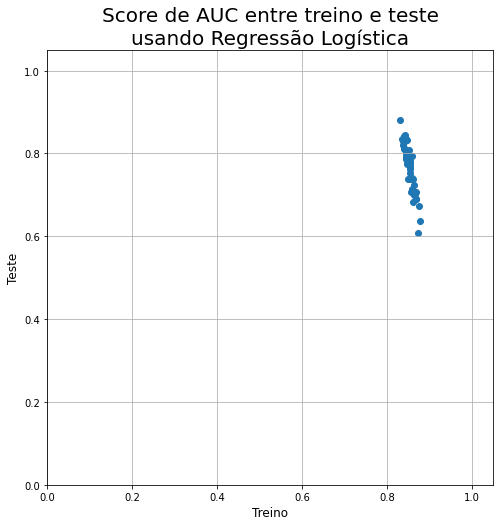

In [92]:
treino, test = roda_modelo_treino_test(modelo,dados_limpos_sem_corr, 5,10)

fig, ax = plt.subplots(figsize = (8,8))

plt.scatter(treino,test)
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel("Treino", fontsize = 12)
plt.ylabel("Teste", fontsize = 12)
plt.title("Score de AUC entre treino e teste\nusando Regressão Logística", fontsize = 20)
plt.grid()

plt.show()

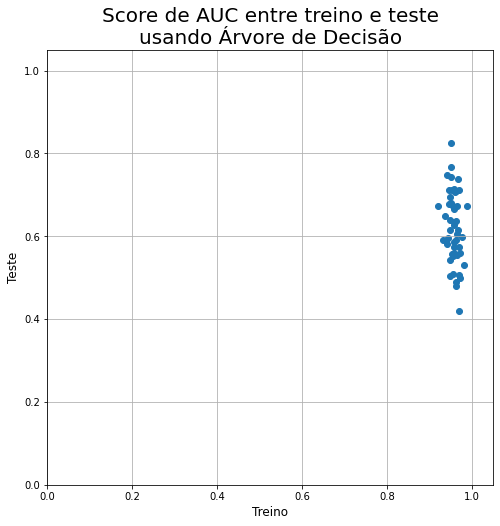

In [93]:
treino, test = roda_modelo_treino_test(modelo_arvore_2,dados_limpos_sem_corr, 5,10)

fig, ax = plt.subplots(figsize = (8,8))

plt.scatter(treino,test)
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel("Treino", fontsize = 12)
plt.ylabel("Teste", fontsize = 12)
plt.title("Score de AUC entre treino e teste\nusando Árvore de Decisão", fontsize = 20)
plt.grid()

plt.show()

### Desafio 14: Ler no Sklearn sobre feature selection, feature importance.


### Desafio 15: Plotar também a matriz de confusão.



### Desafio 16: Repassar pelo desafio 12, com as bases de dados alteradas.

